# HOL-N-ONE Leftover Tabulation (Location | Daily Report)

In [15]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

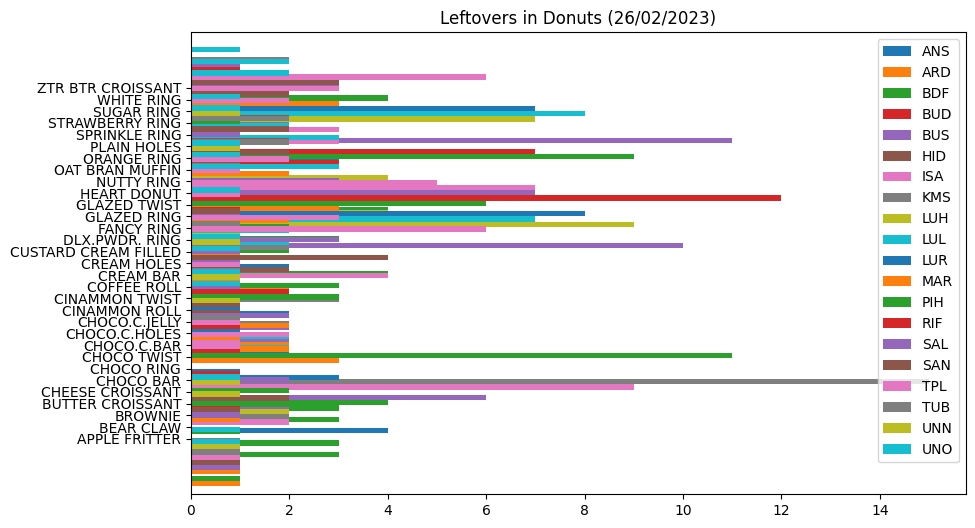

In [16]:
df = pd.read_csv('26_02_2023_hole copy.csv', index_col=0)
df.dropna(axis=1, how='all', inplace=True)

df.plot(kind='barh', title='Leftovers in Donuts (26/02/2023)', figsize=(10, 6), width=9)
plt.show()

In [17]:
import pandas as pd
import folium

# Read the data from the CSV file
df = pd.read_csv('26_02_2023_hole copy.csv')

df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns with missing values
df.dropna(axis=1, how='all', inplace=True)
df.dropna(axis=0, how='all', inplace=True)

# Read the latitude and longitude coordinates from a separate CSV file
coords = pd.read_csv('hole-n-one_locations.csv', header=None)

# Create a dictionary mapping branch names to latitude and longitude coordinates
branch_coords = {}
for index, row in coords.iterrows():
    branch_coords[row[0]] = (row[2], row[1])

# Calculate the largest sum amount of leftover donuts for each branch
largest_sum = df.max().max()

# Create a Folium map centered on the first branch in the DataFrame
map = folium.Map(location=list(branch_coords.values())[0], zoom_start=12)

# Iterate over the branches in the DataFrame and add a circle marker to the map for each branch
for branch in df.columns:
    # Get the latitude and longitude coordinates for the branch
    coords = branch_coords[branch]
    # Calculate the sum amount of leftover donuts for the branch
    sum_leftover = df[branch].sum()
    # Calculate the size of the circle marker based on the largest sum amount of leftover donuts
    size = sum_leftover / largest_sum * 1000
    # Add a circle marker to the map with a popup displaying the branch name and sum amount of leftover donuts
    folium.CircleMarker(location=coords, radius=size, popup=f"{branch}: {sum_leftover} leftover donuts").add_to(map)

# Display the map
map
